In [336]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [337]:
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_rows", 108)

In [338]:
df = pd.read_csv('../Data/data.csv')

In [339]:
df.fillna(method='ffill', inplace=True)

C:\Users\sachi\AppData\Local\Temp\ipykernel_20224\3970806690.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [340]:
df2 = pd.read_csv('../Data/all_india_PO_list_without_APS_offices_ver2.csv')

In [341]:
import re

def extract_pincode(address):
    # Split the address into words
    words = address.split()
    
    # Take the last four words (if available)
    last_four_words = ' '.join(words[-4:])
    
    # Regular expression to find 6 digits with possible spaces in between
    match = re.search(r'(\d\s*\d\s*\d\s*\d\s*\d\s*\d)', last_four_words)
    
    if match:
        # Remove any spaces and return the pincode
        return match.group(0).replace(' ', '')
    
    return None

# Applying the function to the dataframe
df['pincode'] = df['Branch Address'].apply(extract_pincode)

In [342]:
df['pincode'] = df['pincode'].fillna(0)
df['pincode'] = df['pincode'].astype('int64')

In [343]:
df['State'] = [None] * len(df)

# Create a dictionary to store matched pincodes
matched_pincodes = {}

# Iterate through df2 and store circlename for each pincode
for i in range(len(df2)):
    pincode = df2.iloc[i]['pincode']
    circlename = df2.iloc[i]['statename']
    if pincode not in matched_pincodes:
        matched_pincodes[pincode] = circlename

# Iterate through df and update 'State' column
for i in range(len(df)):
    pincode = df.iloc[i]['pincode']
    if pincode in matched_pincodes:
        df.iloc[i, df.columns.get_loc('State')] = matched_pincodes[pincode]

In [344]:
def get_first_word(text):
    if pd.notnull(text):  # Check if the text is not NaN
        return text.split()[0]  # Split by space and return the first word
    return None

# Apply the function to the 'Auction Place' column
df['Auction Place'] = df['Auction Place'].apply(get_first_word)

In [345]:
df['Auction Place'] = df['Auction Place'].str.lower()

In [346]:
df2['divisionname'] = df2['divisionname'].str.lower()
df2['Districtname'] = df2['Districtname'].str.lower()

In [347]:
city_to_state = {
    'alibag': 'Maharashtra',
    'amritsar': 'Punjab',
    'aurangabad': 'Maharashtra',
    'barmer': 'Rajasthan',
    'baruipur': 'West Bengal',
    'belgaum': 'Karnataka',
    'bhatiya': 'Gujarat',
    'bina': 'Madhya Pradesh',
    'chakan': 'Maharashtra',
    'chennai': 'Tamil Nadu',
    'chhatarpur': 'Madhya Pradesh',
    'dadhiyal': 'Gujarat',
    'dehmi': 'Rajasthan',
    'dholka': 'Gujarat',
    'eluru': 'Andhra Pradesh',
    'gadhada': 'Gujarat',
    'gandhidham': 'Gujarat',
    'guna': 'Madhya Pradesh',
    'ibrahimpatnam': 'Telangana',
    'ichalkaranji': 'Maharashtra',
    'jaipur': 'Rajasthan',
    'jalore': 'Rajasthan',
    'jodhpur': 'Rajasthan',
    'kendrapara': 'Odisha',
    'khammam': 'Telangana',
    'kolhapur': 'Maharashtra',
    'korba': 'Chhattisgarh',
    'kutiyan': 'Gujarat',
    'mahudi': 'Gujarat',
    'makrana': 'Rajasthan',
    'mandi': 'Himachal Pradesh',
    'mandvi': 'Gujarat',
    'menpura': 'Gujarat',
    'nanded': 'Maharashtra',
    'narasinghpur': 'Odisha',
    'nathdwara': 'Rajasthan',
    'navagam': 'Gujarat',
    'nellore': 'Andhra Pradesh',
    'nohar': 'Rajasthan',
    'ongole': 'Andhra Pradesh',
    'pandharpur': 'Maharashtra',
    'panipat': 'Haryana',
    'paontasahib': 'Himachal Pradesh',
    'pattancheru': 'Telangana',
    'pundri': 'Haryana',
    'pune': 'Maharashtra',
    'rapar': 'Gujarat',
    'salem': 'Tamil Nadu',
    'sangal': 'Punjab',
    'sayla': 'Gujarat',
    'sehore': 'Madhya Pradesh',
    'shamshabad': 'Telangana',
    'sheopur': 'Madhya Pradesh',
    'sihor': 'Gujarat',
    'sihunj': 'Gujarat',
    'sujangarh': 'Rajasthan',
    'surat': 'Gujarat',
    'thanjavur': 'Tamil Nadu',
    'tirupati': 'Andhra Pradesh',
    'udaipur': 'Rajasthan',
    'ujjain': 'Madhya Pradesh',
    'vadodara': 'Gujarat',
    'vapi': 'Gujarat',
    'vashi': 'Maharashtra',
    'vasna': 'Gujarat',
    'vellore': 'Tamil Nadu',
    'vijayawada': 'Andhra Pradesh',
    'vizag': 'Andhra Pradesh',
    'wakaner': 'Gujarat',
    'wanaparthi': 'Telangana',
    'warangal': 'Telangana',
    'ahmedabad': 'Gujarat',
    'anupgarh': 'Rajasthan',
    'baghera': 'Rajasthan',
    'bazpur': 'Uttarakhand',
    'beawar': 'Rajasthan',
    'bhagta': 'Punjab',
    'bhavnagar': 'Gujarat',
    'chikkaballapur': 'Karnataka',
    'chopda': 'Maharashtra',
    'dharwad': 'Karnataka',
    'gohana': 'Haryana',
    'harike': 'Punjab',
    'itarsi': 'Madhya Pradesh',
    'jaitpura': 'Uttar Pradesh',
    'khopoli': 'Maharashtra',
    'kichha': 'Uttarakhand',
    'madurai': 'Tamil Nadu',
    'nimbahera': 'Rajasthan',
    'palampur': 'Himachal Pradesh',
    'pehowa': 'Haryana',
    'raghunathpur': 'West Bengal',
    'sedam': 'Karnataka',
    'shirpur': 'Maharashtra',
    'sikar': 'Rajasthan',
    'valsad': 'Gujarat',
    'anantpur': 'Andhra Pradesh',
    'botad': 'Gujarat',
    'durg': 'Chhattisgarh',
    'firozpur': 'Punjab',
    'kopergaon': 'Maharashtra',
    'korutla': 'Telangana',
    'ladwa': 'Haryana',
    'lunawada': 'Gujarat',
    'mahendragarh': 'Haryana',
    'manendragarh': 'Chhattisgarh',
    'mysore': 'Karnataka',
    'nagpur': 'Maharashtra',
    'nandyal': 'Andhra Pradesh',
    'pandhurli': 'Maharashtra',
    'parsa': 'Bihar',
    'pataudi': 'Haryana',
    'rajkot': 'Gujarat',
    'rania': 'Haryana',
    'sathupalli': 'Telangana',
    'taraori': 'Haryana',
    'theni': 'Tamil Nadu',
    'vinchur': 'Maharashtra',
    'wani': 'Maharashtra',
    'puri': 'Odisha',
    'bhadrachallam': 'Telangana',
    'chalisgaon': 'Maharashtra',
    'dongargarh': 'Chhattisgarh',
    'ahmednagar': 'Maharashtra',
    'anakapalle': 'Andhra Pradesh',
    'banglore': 'Karnataka',
    'bhubaneswar': 'Odisha',
    'bikaner': 'Rajasthan',
    'chandrapur': 'Maharashtra',
    'dahanu': 'Maharashtra',
    'fazilka': 'Punjab',
    'gadwal': 'Telangana',
    'gajwel': 'Telangana',
    'ganj': 'Uttar Pradesh',
    'gudhamalani': 'Rajasthan',
    'jabalpur': 'Madhya Pradesh',
    'jharsuguda': 'Odisha',
    'kaniha': 'Odisha',
    'karaikal': 'Puducherry',
    'kharde': 'Maharashtra',
    'madanapalle': 'Andhra Pradesh',
    'malegaon': 'Maharashtra',
    'nizamabad': 'Telangana',
    'nuapada': 'Odisha',
    'pondicherry': 'Puducherry',
    'ramseen': 'Rajasthan',
    'rayachoti': 'Andhra Pradesh',
    'siddipet': 'Telangana',
    'solan': 'Himachal Pradesh',
    'tadipatri': 'Andhra Pradesh',
    'nawalgarh': 'Rajasthan',
    'patan': 'Gujarat',
    'sullurpeta': 'Andhra Pradesh'
}


In [348]:
def get_state(city):
    return city_to_state.get(city.lower(), 'Unknown')

df.loc[df['pincode'] == 0, 'State'] = df['Auction Place'].apply(get_state)

In [349]:
df['State'] = df['State'].str.lower()

### Checking Null values

In [350]:
df.isnull().sum()

Agreement Number                           0
Disbursement Date                          0
Loan Amount                                0
Number of Ornaments                        0
Gross Auction Weight of Ornaments(gm)      0
Auction Date                               0
Auction Place                              0
Branch Address                             0
pincode                                    0
State                                    212
dtype: int64

### Sample from dataset

In [351]:
df.head()

,Agreement Number,Disbursement Date,Loan Amount,Number of Ornaments,Gross Auction Weight of Ornaments(gm),Auction Date,Auction Place,Branch Address,pincode,State
0,PV97SGL7830716,18-May-23,80099.000,1,21.100,12-Aug-24,adilabad,"Mahajan Complex, First floor, Busstand road. Dwaraka nagar, Adilabad- 504001",504001,telangana
1,PV97SGL7844024,19-May-23,57799.000,1,14.000,12-Aug-24,adilabad,"Mahajan Complex, First floor, Busstand road. Dwaraka nagar, Adilabad- 504001",504001,telangana
2,PV97SGL7918636,25-May-23,19599.000,1,5.200,12-Aug-24,adilabad,"Mahajan Complex, First floor, Busstand road. Dwaraka nagar, Adilabad- 504001",504001,telangana
3,PV97SGL8121108,13-Jun-23,48258.000,1,11.800,12-Aug-24,adilabad,"Mahajan Complex, First floor, Busstand road. Dwaraka nagar, Adilabad- 504001",504001,telangana
4,PV97SGL8143786,15-Jun-23,145174.000,1,35.500,12-Aug-24,adilabad,"Mahajan Complex, First floor, Busstand road. Dwaraka nagar, Adilabad- 504001",504001,telangana


In [352]:
df_historical = pd.read_csv('../Data/XAU_INR Historical Data.csv')

### Sample from Historical data
- Prices are for 1 Troy ounce (28 gm)

In [353]:
df_historical

,Date,Price,Open,High,Low,Vol.,Change %
0,10-10-2024,"219,502","219,004","219,690","218,771",NaN,0.27%
1,09-10-2024,"218,918","220,171","220,310","218,734",NaN,-0.52%
2,08-10-2024,"220,062","221,961","222,771","218,731",NaN,-0.82%
3,07-10-2024,"221,887","222,775","223,425","221,568",NaN,-0.47%
4,04-10-2024,"222,933","223,121","224,308","221,197",NaN,-0.04%
...,...,...,...,...,...,...,...
1516,18-12-2018,"88,198","89,221","89,429","87,871",NaN,-1.10%
1517,17-12-2018,"89,176","89,008","89,398","88,585",NaN,0.16%
1518,14-12-2018,"89,033","88,827","89,277","88,736",NaN,0.26%
1519,13-12-2018,"88,804","89,517","89,581","88,685",NaN,-0.71%


### Columns of Historical Data

In [354]:
df_historical.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

### Columns of Dataset

In [355]:
df.columns

Index(['Agreement Number', 'Disbursement Date', 'Loan Amount',
       'Number of Ornaments', 'Gross Auction Weight of Ornaments(gm)',
       'Auction Date', 'Auction Place', 'Branch Address', 'pincode', 'State'],
      dtype='object')

In [356]:
numerical_columns = ['Loan Amount','Number of Ornaments', 'Gross Auction Weight of Ornaments(gm)']

In [357]:
plt.rcParams.update({'font.size': 13})

### Loan amount distribution

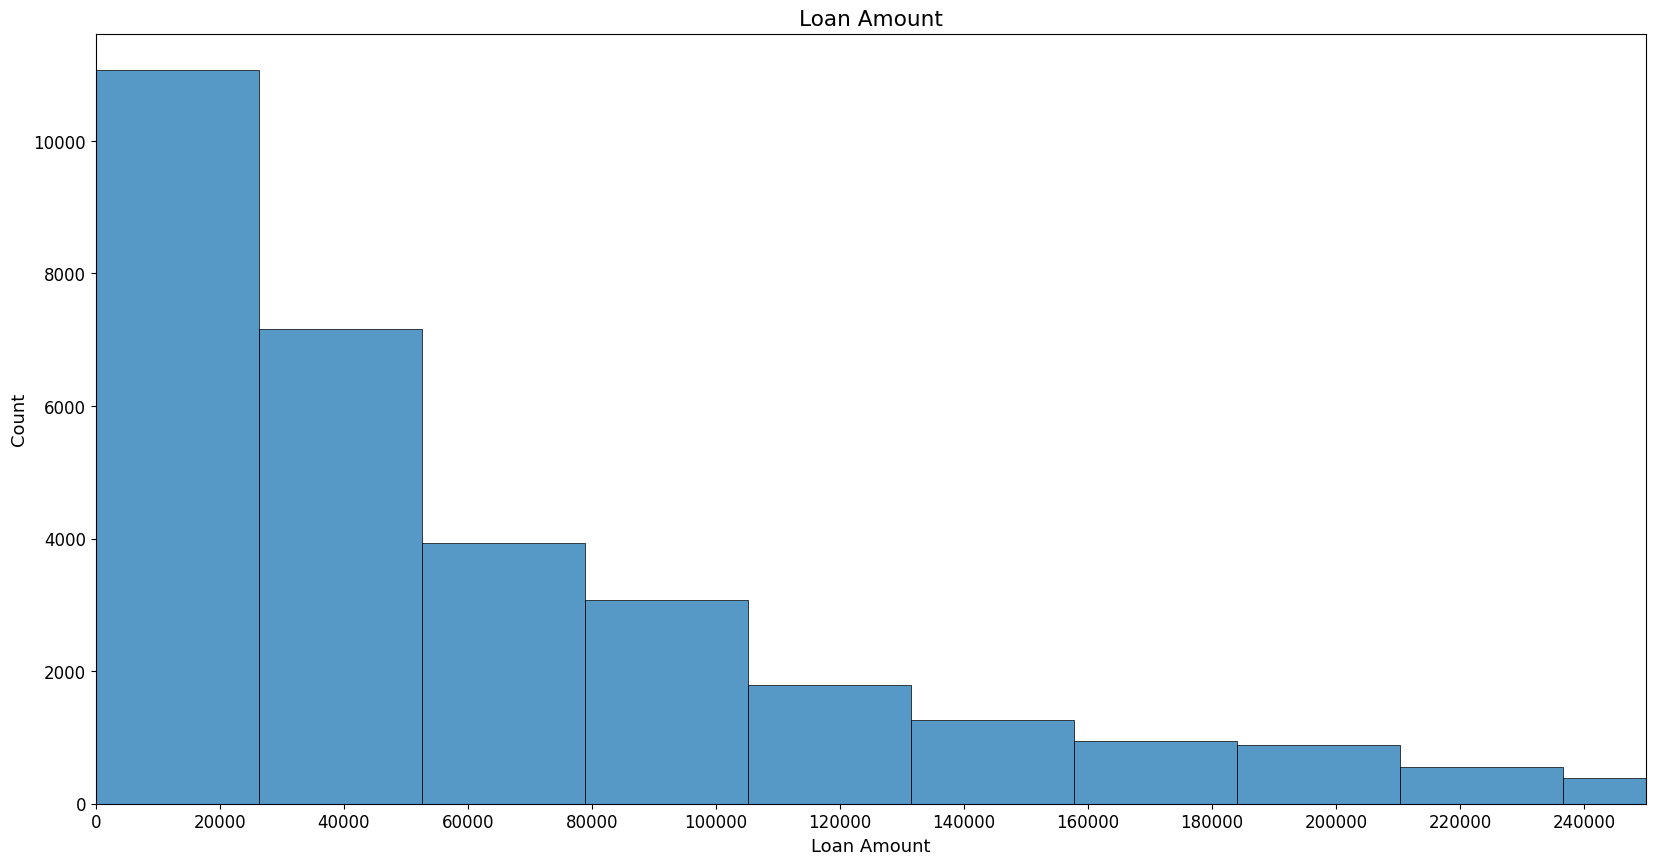

In [358]:

plt.figure(figsize=(20, 10))
sns.histplot(df['Loan Amount'], bins=200)
plt.title('Loan Amount')
plt.ticklabel_format(style='plain')
plt.xticks(np.arange(0, max(df['Loan Amount'])+1, 20000))
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.xlim(0, 250000)
plt.show()

### Number of ornaments distribution

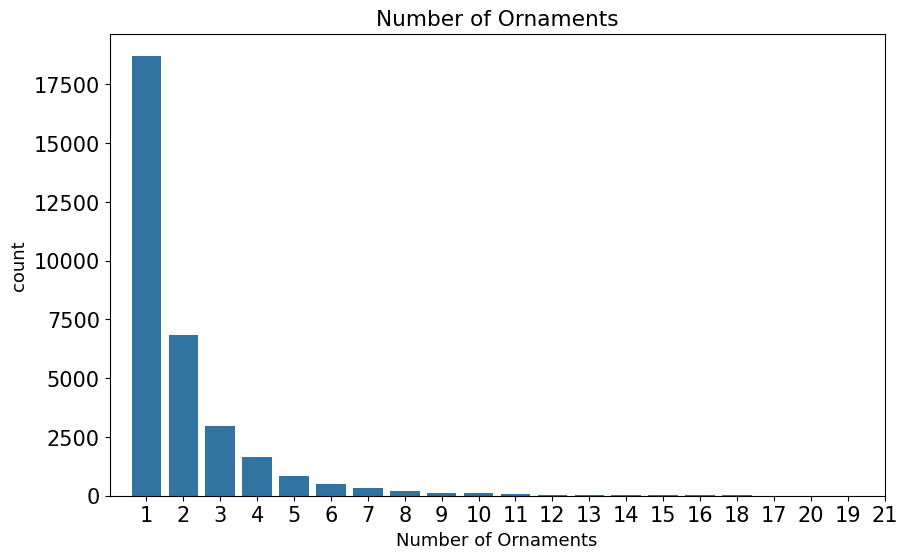

In [359]:
# 5. Loan Cycle
plt.figure(figsize=(10, 6))
sns.countplot(x='Number of Ornaments', data=df, order=df['Number of Ornaments'].value_counts().index)
plt.title('Number of Ornaments')
plt.xlim(-1,20)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.show()

### Distribution of Ornament Weight (gm)

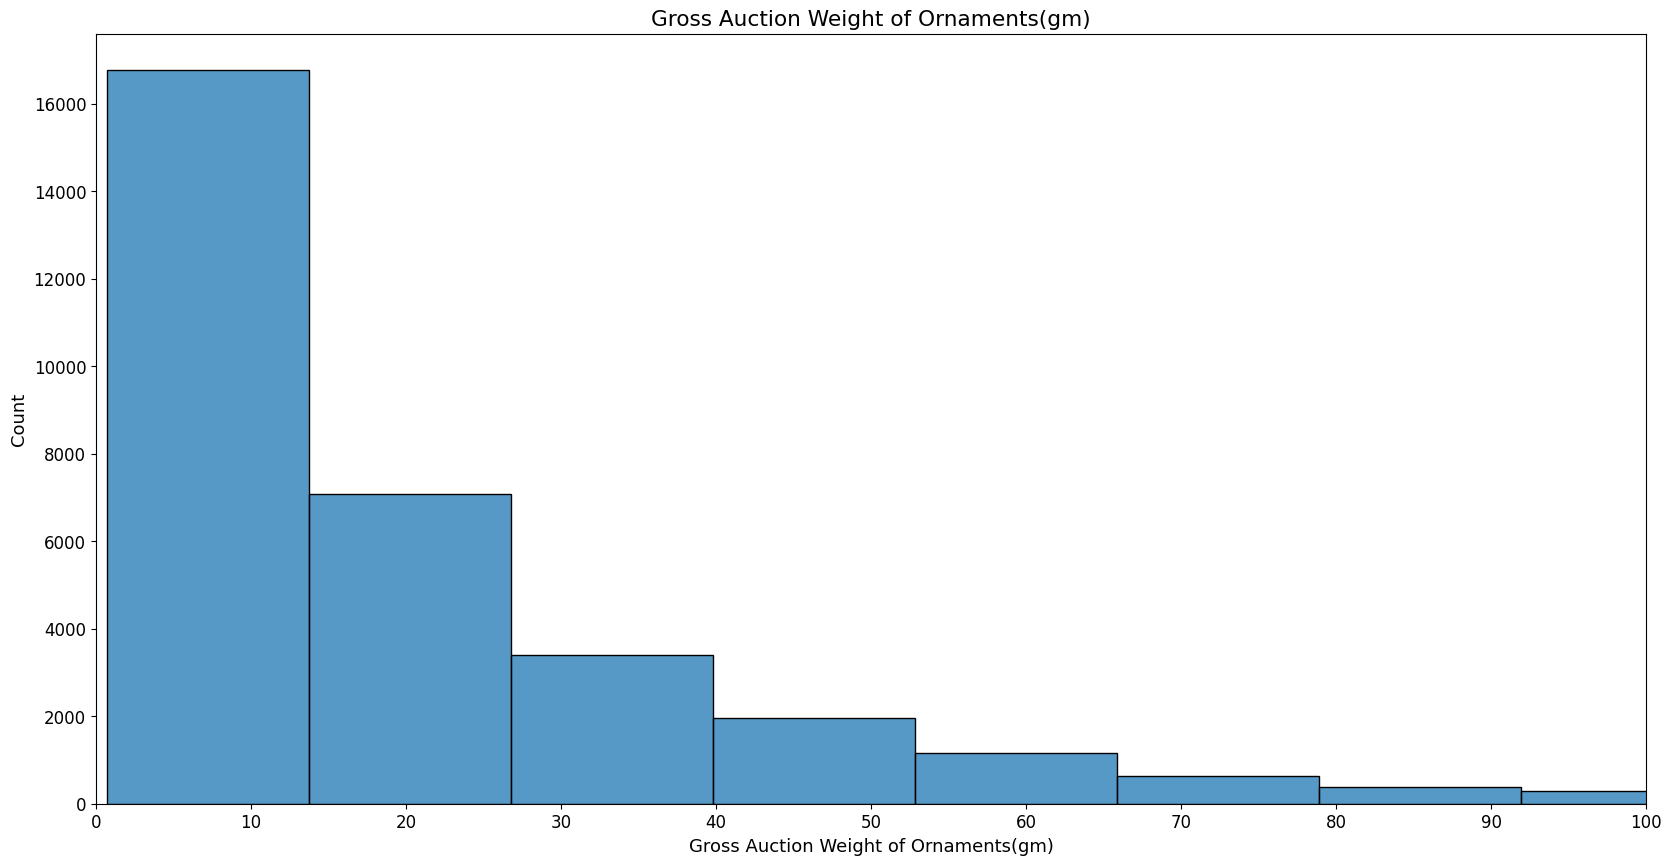

In [360]:
plt.figure(figsize=(20, 10))
sns.histplot(df['Gross Auction Weight of Ornaments(gm)'], bins=100)
plt.title('Gross Auction Weight of Ornaments(gm)')
plt.ticklabel_format(style='plain')
plt.xticks(np.arange(0, max(df['Gross Auction Weight of Ornaments(gm)'])+1, 10))
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)
plt.xlim(0,100) 
plt.show()

### Correlation between Loan Amount and Gross Auction Weight of Ornaments(gm)

In [361]:
df['Loan Amount'].corr(df['Gross Auction Weight of Ornaments(gm)'])

np.float64(0.8613470226275941)

### Calculation of Price on Disbursement Date and Auction Date

In [362]:
from datetime import datetime

def convert_date(x):
    for fmt in ['%d-%b-%y', '%d-%b-%Y', '%d-%m-%Y']:
        try:
            return datetime.strptime(x, fmt).strftime('%d-%m-%Y')
        except ValueError:
            continue  
    return None 


In [363]:
df['Auction Date'] = df['Auction Date'].apply(convert_date)

In [364]:
df_historical

,Date,Price,Open,High,Low,Vol.,Change %
0,10-10-2024,"219,502","219,004","219,690","218,771",NaN,0.27%
1,09-10-2024,"218,918","220,171","220,310","218,734",NaN,-0.52%
2,08-10-2024,"220,062","221,961","222,771","218,731",NaN,-0.82%
3,07-10-2024,"221,887","222,775","223,425","221,568",NaN,-0.47%
4,04-10-2024,"222,933","223,121","224,308","221,197",NaN,-0.04%
...,...,...,...,...,...,...,...
1516,18-12-2018,"88,198","89,221","89,429","87,871",NaN,-1.10%
1517,17-12-2018,"89,176","89,008","89,398","88,585",NaN,0.16%
1518,14-12-2018,"89,033","88,827","89,277","88,736",NaN,0.26%
1519,13-12-2018,"88,804","89,517","89,581","88,685",NaN,-0.71%


In [365]:
df_historical['Date'] = df_historical['Date'].apply(convert_date)


In [366]:
df_historical

,Date,Price,Open,High,Low,Vol.,Change %
0,10-10-2024,"219,502","219,004","219,690","218,771",NaN,0.27%
1,09-10-2024,"218,918","220,171","220,310","218,734",NaN,-0.52%
2,08-10-2024,"220,062","221,961","222,771","218,731",NaN,-0.82%
3,07-10-2024,"221,887","222,775","223,425","221,568",NaN,-0.47%
4,04-10-2024,"222,933","223,121","224,308","221,197",NaN,-0.04%
...,...,...,...,...,...,...,...
1516,18-12-2018,"88,198","89,221","89,429","87,871",NaN,-1.10%
1517,17-12-2018,"89,176","89,008","89,398","88,585",NaN,0.16%
1518,14-12-2018,"89,033","88,827","89,277","88,736",NaN,0.26%
1519,13-12-2018,"88,804","89,517","89,581","88,685",NaN,-0.71%


In [367]:
df['Auction Date'] = pd.to_datetime(df['Auction Date'],format='%d-%m-%Y')
df_historical['Date'] = pd.to_datetime(df_historical['Date'],format='%d-%m-%Y')


In [368]:
df_merged = pd.merge_asof(df.sort_values('Auction Date'), 
                           df_historical.sort_values('Date'), 
                           left_on='Auction Date', 
                           right_on='Date', 
                           direction='backward')

In [369]:
df_merged.columns

Index(['Agreement Number', 'Disbursement Date', 'Loan Amount',
       'Number of Ornaments', 'Gross Auction Weight of Ornaments(gm)',
       'Auction Date', 'Auction Place', 'Branch Address', 'pincode', 'State',
       'Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'],
      dtype='object')

In [370]:
df_merged = df_merged.rename(columns={'Price': 'OnAuctionDate(Troy ounces)'})
df_merged = df_merged.drop(columns=['Date','Open', 'High', 'Low', 'Vol.', 'Change %'])

In [371]:
df_merged['Disbursement Date'] = df_merged['Disbursement Date'].apply(convert_date)
df_merged['Disbursement Date'] = pd.to_datetime(df_merged['Disbursement Date'],format='%d-%m-%Y')

In [372]:
df_merged = pd.merge_asof(df_merged.sort_values('Disbursement Date'), 
                           df_historical.sort_values('Date'), 
                           left_on='Disbursement Date', 
                           right_on='Date', 
                           direction='backward')

In [373]:
df_merged = df_merged.rename(columns={'Price': 'OnDisbursementDate(Troy ounces)'})
df_merged = df_merged.drop(columns=['Date','Open', 'High', 'Low', 'Vol.', 'Change %'])

In [374]:
df_merged['OnAuctionDate(Troy ounces)'] = df_merged['OnAuctionDate(Troy ounces)'].str.replace(',', '')

df_merged['OnAuctionDate(Troy ounces)'] = pd.to_numeric(df_merged['OnAuctionDate(Troy ounces)'])
df_merged['OnAuctionDate(Troy ounces)'] = df_merged['OnAuctionDate(Troy ounces)'] * 0.916
df_merged['OnDisbursementDate(Troy ounces)'] = df_merged['OnDisbursementDate(Troy ounces)'].str.replace(',', '')

df_merged['OnDisbursementDate(Troy ounces)'] = pd.to_numeric(df_merged['OnDisbursementDate(Troy ounces)'])
df_merged['OnDisbursementDate(Troy ounces)'] = df_merged['OnDisbursementDate(Troy ounces)'] * 0.916

df_merged['Gross Auction Weight of Ornaments(gm)'] = pd.to_numeric(df_merged['Gross Auction Weight of Ornaments(gm)'])
df_merged['Loan Amount'] = pd.to_numeric(df_merged['Loan Amount'])


In [375]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32570 entries, 0 to 32569
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Agreement Number                       32570 non-null  object        
 1   Disbursement Date                      32570 non-null  datetime64[ns]
 2   Loan Amount                            32570 non-null  float64       
 3   Number of Ornaments                    32570 non-null  int64         
 4   Gross Auction Weight of Ornaments(gm)  32570 non-null  float64       
 5   Auction Date                           32570 non-null  datetime64[ns]
 6   Auction Place                          32570 non-null  object        
 7   Branch Address                         32570 non-null  object        
 8   pincode                                32570 non-null  int64         
 9   State                                  32358 non-null  object

In [376]:
df_merged['PricePerGramOnAuctionDate'] = df_merged['OnAuctionDate(Troy ounces)'] / 28.35

df_merged['ValueOnAuctionDate'] = df_merged['PricePerGramOnAuctionDate'] * df_merged['Gross Auction Weight of Ornaments(gm)']

In [377]:
df_merged['PricePerGramOnDisbursementDate'] = df_merged['OnDisbursementDate(Troy ounces)'] / 28.35

df_merged['ValueOnDisbursementDate'] = df_merged['PricePerGramOnDisbursementDate'] * df_merged['Gross Auction Weight of Ornaments(gm)']

### Final Data

In [378]:
df_merged.head()

,Agreement Number,Disbursement Date,Loan Amount,Number of Ornaments,Gross Auction Weight of Ornaments(gm),Auction Date,Auction Place,Branch Address,pincode,State,OnAuctionDate(Troy ounces),OnDisbursementDate(Troy ounces),PricePerGramOnAuctionDate,ValueOnAuctionDate,PricePerGramOnDisbursementDate,ValueOnDisbursementDate
0,PU40GOL1651182,2020-05-11,30040.000,1,11.700,2024-10-16,koraput,"Bajaj Finance Limited., 2nd Floor, Murty Complex, Above- HDFC Bank, Main Road, Koraput – 764020. Orissa",764020,odisha,201063.832,117836.988,7092.199,82978.724,4156.508,48631.138
1,PU40GOL1653089,2020-05-12,19540.000,2,7.200,2024-10-16,koraput,"Bajaj Finance Limited., 2nd Floor, Murty Complex, Above- HDFC Bank, Main Road, Koraput – 764020. Orissa",764020,odisha,201063.832,116980.528,7092.199,51063.830,4126.297,29709.340
2,PU40GOL1662289,2020-05-15,24035.000,1,10.600,2024-10-16,koraput,"Bajaj Finance Limited., 2nd Floor, Murty Complex, Above- HDFC Bank, Main Road, Koraput – 764020. Orissa",764020,odisha,201063.832,120935.816,7092.199,75177.306,4265.814,45217.624
3,PU40GOL1664576,2020-05-16,25035.000,2,11.300,2024-10-16,koraput,"Bajaj Finance Limited., 2nd Floor, Murty Complex, Above- HDFC Bank, Main Road, Koraput – 764020. Orissa",764020,odisha,201063.832,120935.816,7092.199,80141.845,4265.814,48203.694
4,PU40GOL1671078,2020-05-19,17535.000,2,6.500,2024-10-16,koraput,"Bajaj Finance Limited., 2nd Floor, Murty Complex, Above- HDFC Bank, Main Road, Koraput – 764020. Orissa",764020,odisha,201063.832,120805.744,7092.199,46099.291,4261.226,27697.966


### Analysis on difference between ValueOnDisbursementDate and Loan Amount

C:\Users\sachi\AppData\Local\Temp\ipykernel_20224\1840986461.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=difference, palette='viridis', ax=axs[0, 0])


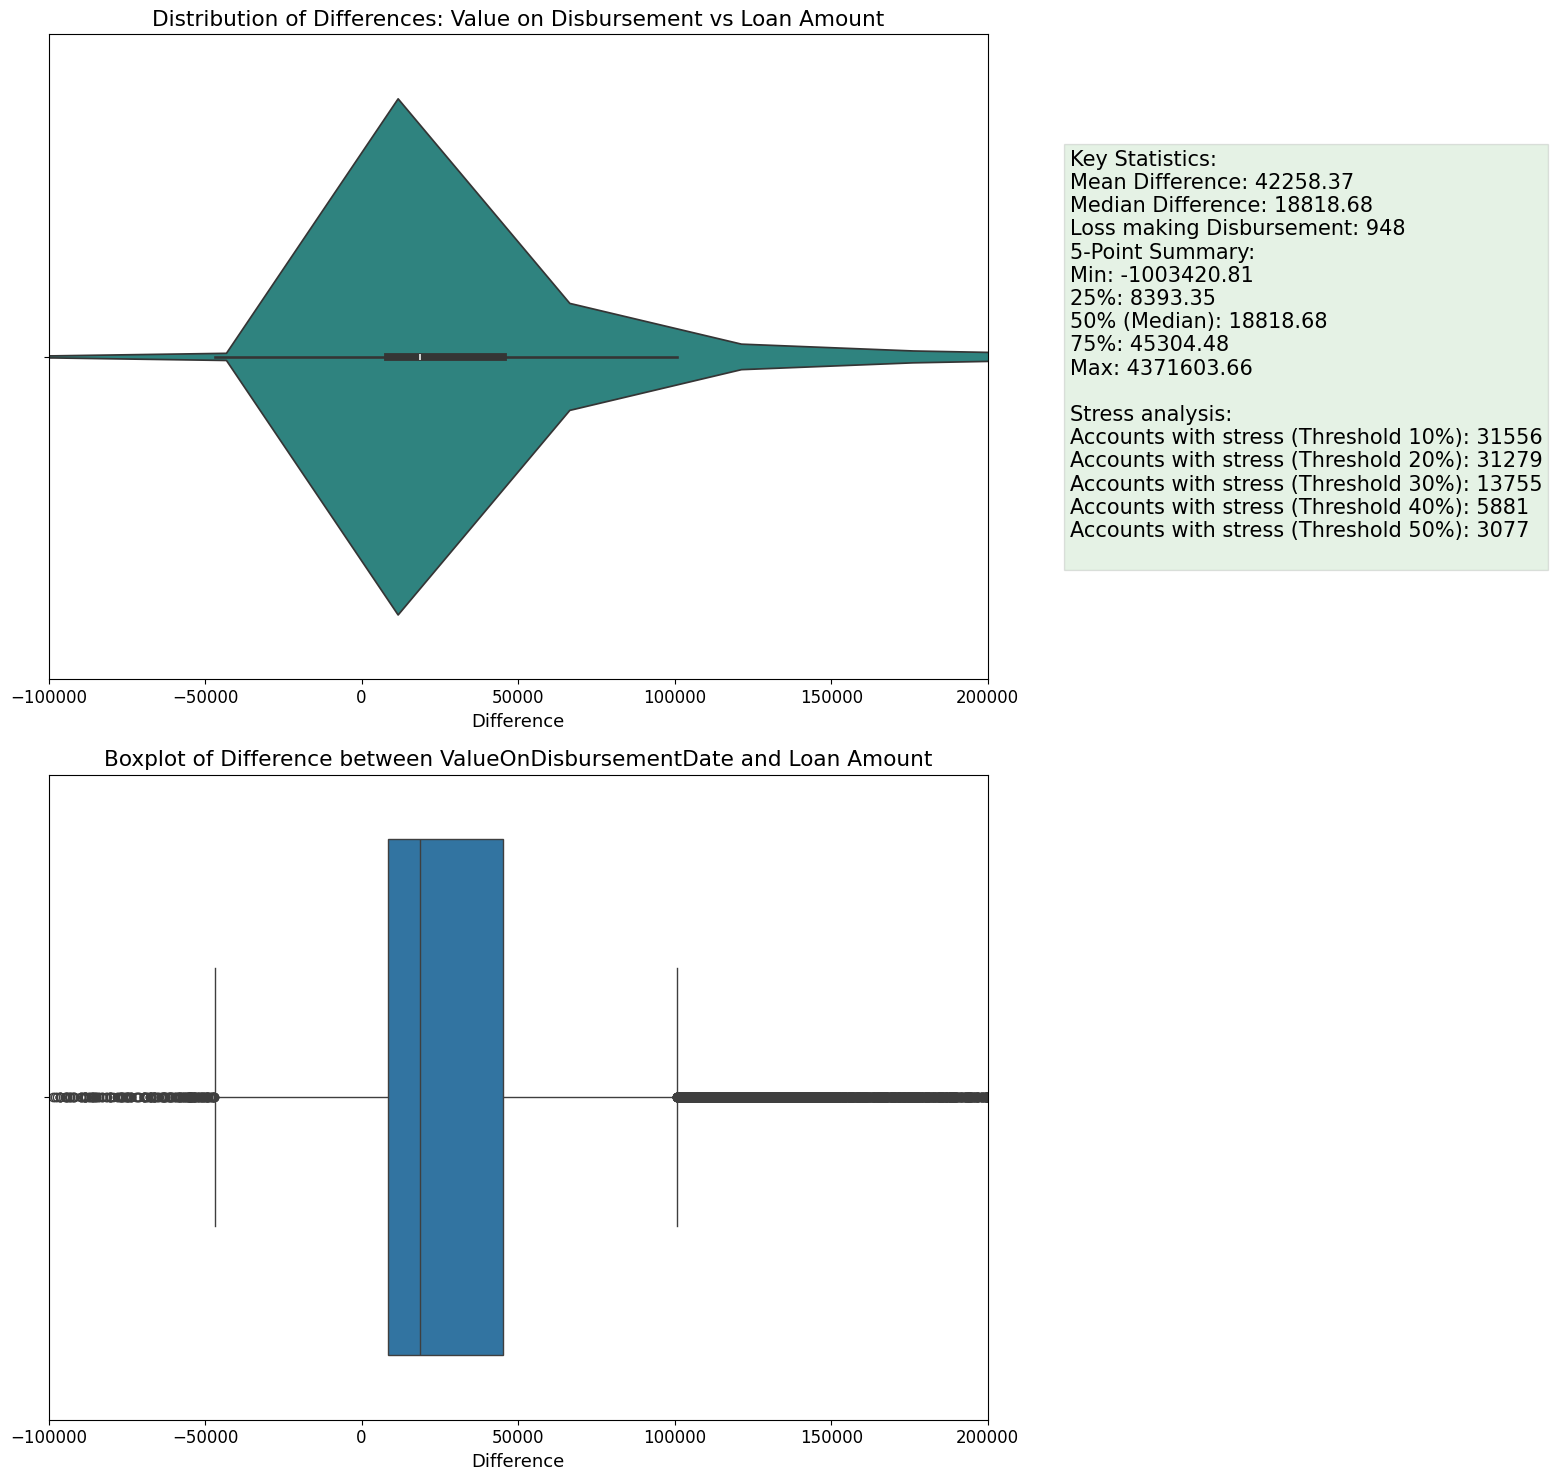

In [379]:
difference = df_merged['ValueOnDisbursementDate'] - df_merged['Loan Amount']

count_diff_less_than_zero = (difference < 0).sum()
mean_diff = difference.mean()
median_diff = difference.median()
percentage_diff = (difference / df_merged['ValueOnDisbursementDate']) * 100

count_greater_than_10_percent = (percentage_diff > 10).sum()
count_greater_than_20_percent = (percentage_diff > 20).sum()
count_greater_than_30_percent = (percentage_diff > 30).sum()
count_greater_than_40_percent = (percentage_diff > 40).sum()
count_greater_than_50_percent = (percentage_diff > 50).sum()

five_point_summary = difference.describe(percentiles=[0.25, 0.5, 0.75])[['min', '25%', '50%', '75%', 'max']]

summary_text = (
    f"Key Statistics:\n"
    f"Mean Difference: {mean_diff:.2f}\n"
    f"Median Difference: {median_diff:.2f}\n"
    f"Loss making Disbursement: {count_diff_less_than_zero}\n"
    f"5-Point Summary:\n"
    f"Min: {five_point_summary['min']:.2f}\n"
    f"25%: {five_point_summary['25%']:.2f}\n"
    f"50% (Median): {five_point_summary['50%']:.2f}\n"
    f"75%: {five_point_summary['75%']:.2f}\n"
    f"Max: {five_point_summary['max']:.2f}\n\n"
    f"Stress analysis:\n"
    f"Accounts with stress (Threshold 10%): {count_greater_than_10_percent}\n"
    f"Accounts with stress (Threshold 20%): {count_greater_than_20_percent}\n"
    f"Accounts with stress (Threshold 30%): {count_greater_than_30_percent}\n"
    f"Accounts with stress (Threshold 40%): {count_greater_than_40_percent}\n"
    f"Accounts with stress (Threshold 50%): {count_greater_than_50_percent}\n"

)

fig, axs = plt.subplots(2, 2, figsize=(16, 15), gridspec_kw={'width_ratios': [3, 1]})

sns.violinplot(x=difference, palette='viridis', ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Differences: Value on Disbursement vs Loan Amount')
axs[0, 0].set_xlim(-100000, 200000)
axs[0, 0].set_xlabel('Difference')

axs[0, 1].axis('off') 
axs[0, 1].text(0.1, 0.5, summary_text, fontsize=15, verticalalignment='center', bbox=dict(facecolor='green', alpha=0.1))

sns.boxplot(x=difference, ax=axs[1, 0])
axs[1, 0].set_title('Boxplot of Difference between ValueOnDisbursementDate and Loan Amount')
axs[1, 0].set_xlabel('Difference')
axs[1, 0].set_xlim(-100000, 200000)

axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

In [380]:
difference = df_merged['ValueOnDisbursementDate'] - df_merged['Loan Amount']

In [381]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [382]:
df_merged[df_merged['ValueOnDisbursementDate'] - df_merged['Loan Amount'] == difference.min()]

,Agreement Number,Disbursement Date,Loan Amount,Number of Ornaments,Gross Auction Weight of Ornaments(gm),Auction Date,Auction Place,Branch Address,pincode,State,OnAuctionDate(Troy ounces),OnDisbursementDate(Troy ounces),PricePerGramOnAuctionDate,ValueOnAuctionDate,PricePerGramOnDisbursementDate,ValueOnDisbursementDate
932,PY59GOL5173498,2022-08-08,1161172.000,2,34.300,2023-10-18,mandi,"Bajaj Finance LTD.,Ground Floor, Near Muthoot, Paul Marchent & Central Bank, Chautala Road, mandi dabawali, Sirsa, Haryana – 125104",125104,haryana,148448.792,130386.188,5236.289,179604.711,4599.160,157751.190


### Distribution of high stress accounts (40%)

In [383]:
difference = df_merged['ValueOnDisbursementDate'] - df_merged['Loan Amount']

count_diff_less_than_zero = (difference < 0).sum()
mean_diff = difference.mean()
median_diff = difference.median()
percentage_diff = (difference / df_merged['ValueOnDisbursementDate']) * 100

count_greater_than_40_percent = (percentage_diff > 40).sum()
count_greater_than_50_percent = (percentage_diff > 50).sum()



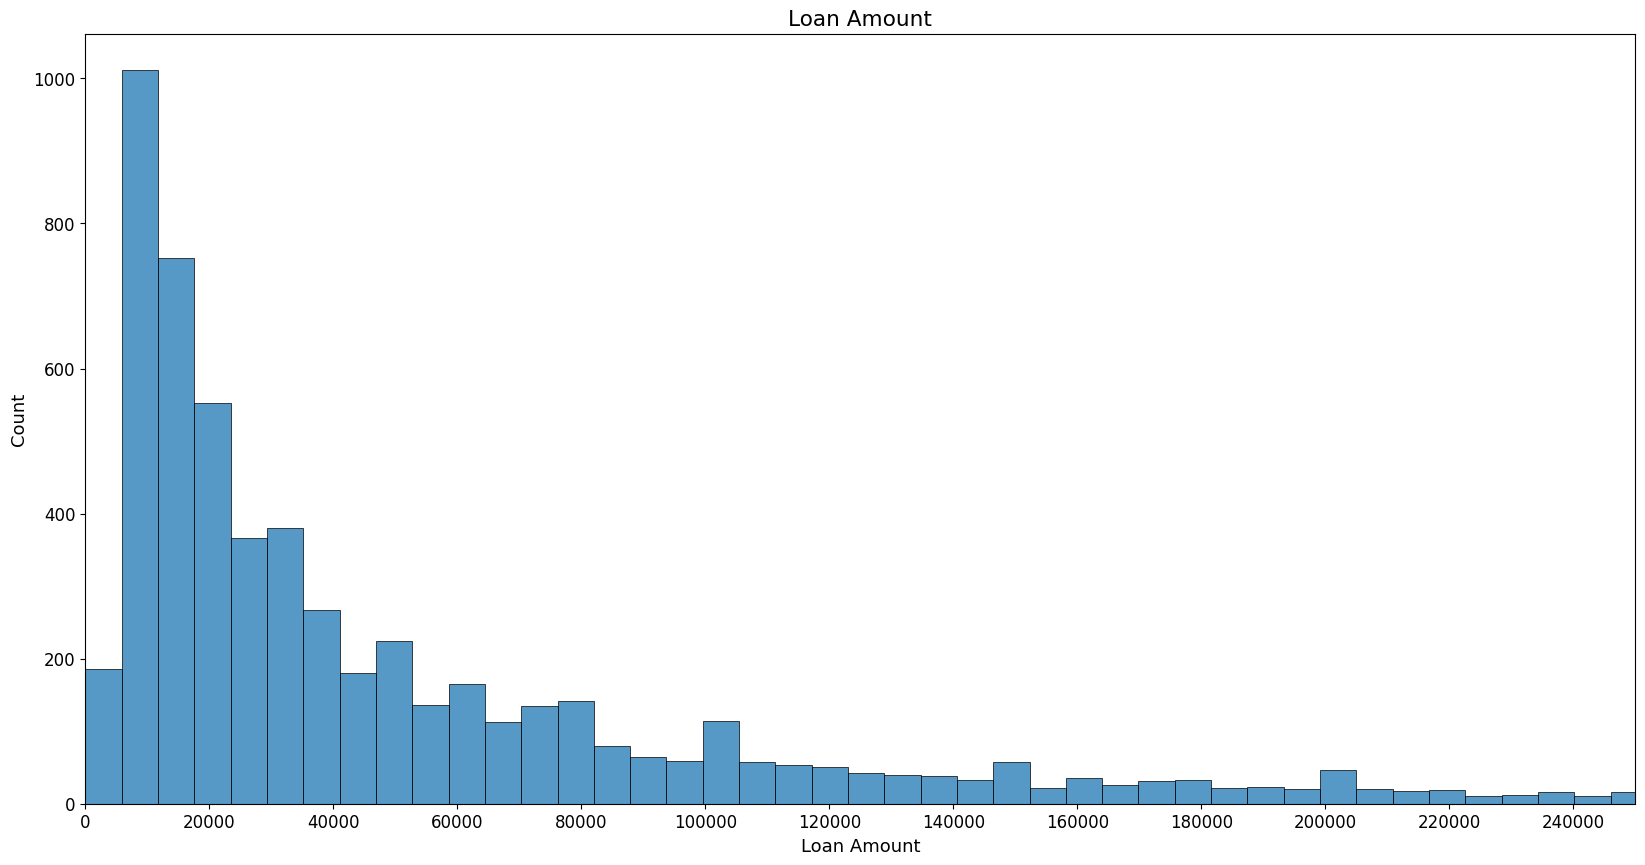

In [384]:
rows_greater_than_40_percent = df_merged[percentage_diff > 40]

plt.figure(figsize=(20, 10))
sns.histplot(rows_greater_than_40_percent['Loan Amount'], bins=200)
plt.title('Loan Amount')
plt.ticklabel_format(style='plain')
plt.xticks(np.arange(0, max(df['Loan Amount'])+1, 20000))
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.xlim(0, 250000)
plt.show()

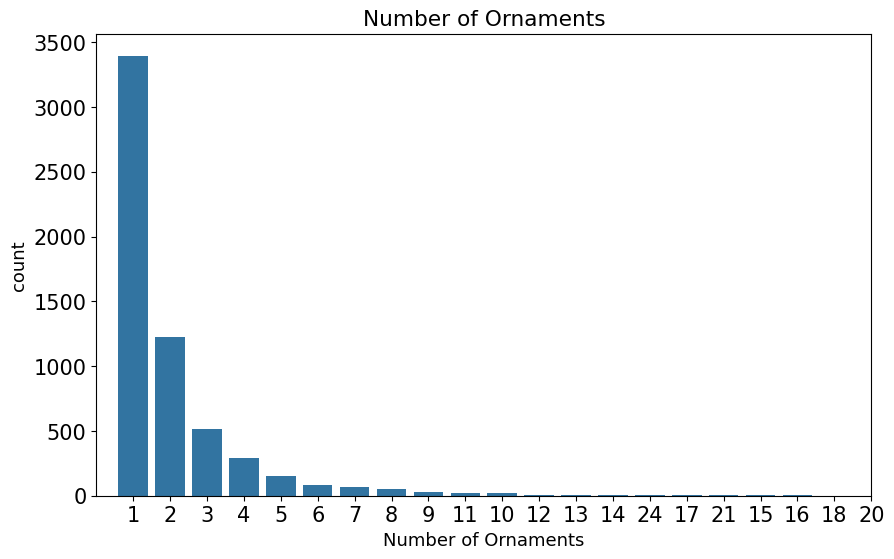

In [385]:
# 5. Loan Cycle
plt.figure(figsize=(10, 6))
sns.countplot(x='Number of Ornaments', data=rows_greater_than_40_percent, order=rows_greater_than_40_percent['Number of Ornaments'].value_counts().index)
plt.title('Number of Ornaments')
plt.xlim(-1,20)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.show()

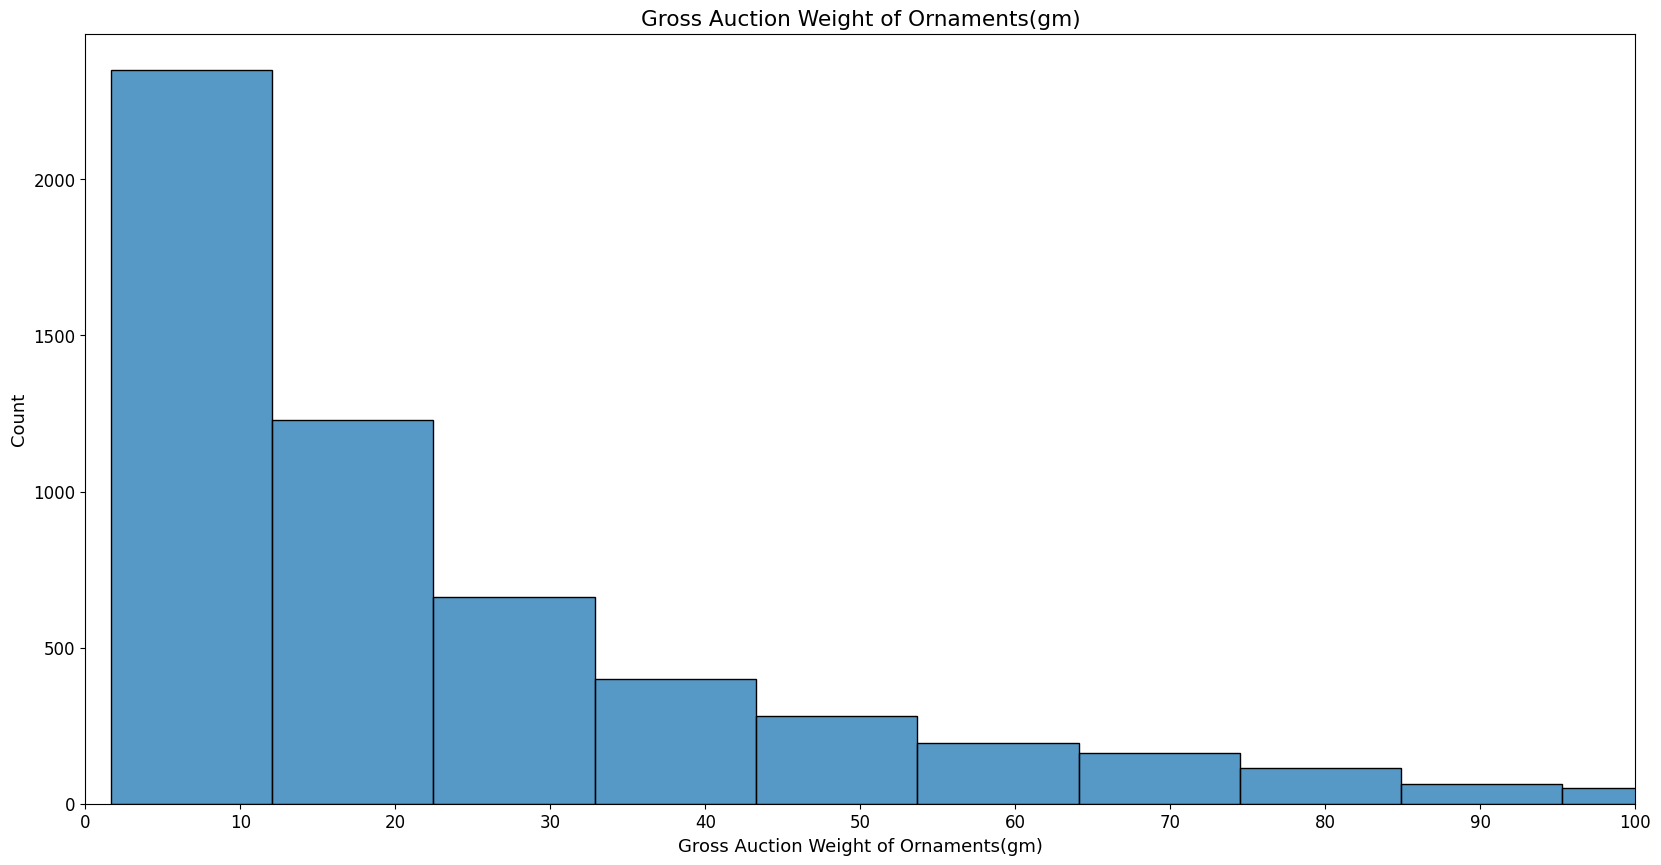

In [386]:
plt.figure(figsize=(20, 10))
sns.histplot(rows_greater_than_40_percent['Gross Auction Weight of Ornaments(gm)'], bins=100)
plt.title('Gross Auction Weight of Ornaments(gm)')
plt.ticklabel_format(style='plain')
plt.xticks(np.arange(0, max(df['Gross Auction Weight of Ornaments(gm)'])+1, 10))
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)
plt.xlim(0,100) 
plt.show()

### Analysis on difference between ValueOnAuctionDate and Loan Amount

C:\Users\sachi\AppData\Local\Temp\ipykernel_20224\2147479058.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=difference, palette='viridis', ax=axs[0, 0])


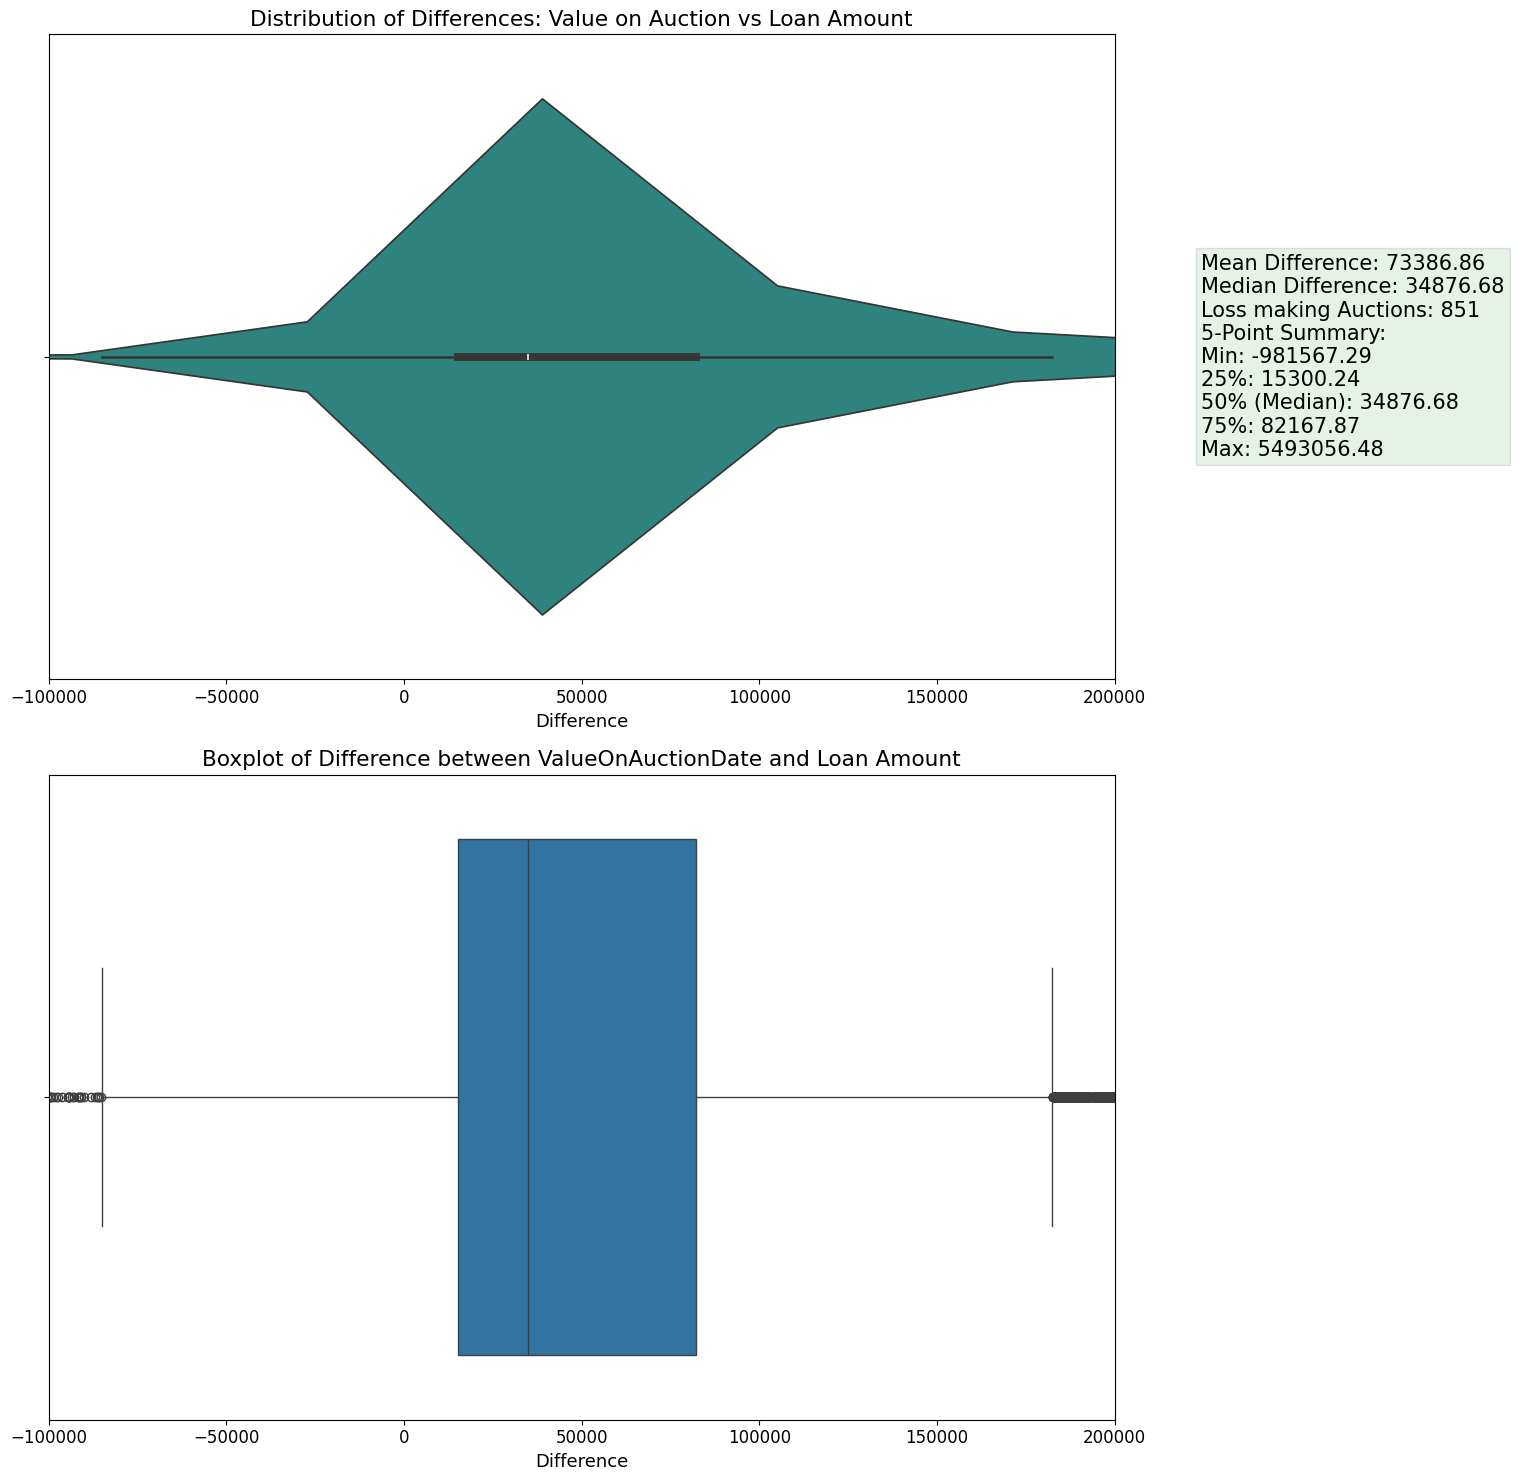

In [387]:
difference = df_merged['ValueOnAuctionDate'] - df_merged['Loan Amount']

count_diff_less_than_zero = (difference < 0).sum()
mean_diff = difference.mean()
median_diff = difference.median()

five_point_summary = difference.describe(percentiles=[0.25, 0.5, 0.75])[['min', '25%', '50%', '75%', 'max']]

summary_text = (
    f"Mean Difference: {mean_diff:.2f}\n"
    f"Median Difference: {median_diff:.2f}\n"
    f"Loss making Auctions: {count_diff_less_than_zero}\n"
    f"5-Point Summary:\n"
    f"Min: {five_point_summary['min']:.2f}\n"
    f"25%: {five_point_summary['25%']:.2f}\n"
    f"50% (Median): {five_point_summary['50%']:.2f}\n"
    f"75%: {five_point_summary['75%']:.2f}\n"
    f"Max: {five_point_summary['max']:.2f}"
)

fig, axs = plt.subplots(2, 2, figsize=(16, 15), gridspec_kw={'width_ratios': [3, 1]})

sns.violinplot(x=difference, palette='viridis', ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Differences: Value on Auction vs Loan Amount')
axs[0, 0].set_xlim(-100000, 200000)
axs[0, 0].set_xlabel('Difference')

axs[0, 1].axis('off') 
axs[0, 1].text(0.1, 0.5, summary_text, fontsize=15, verticalalignment='center', bbox=dict(facecolor='green', alpha=0.1))

sns.boxplot(x=difference, ax=axs[1, 0])
axs[1, 0].set_title('Boxplot of Difference between ValueOnAuctionDate and Loan Amount')
axs[1, 0].set_xlabel('Difference')
axs[1, 0].set_xlim(-100000, 200000)

axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

In [388]:
df_merged.iloc[3219]

Agreement Number                                                                                   P79AGOL5307297
Disbursement Date                                                                             2022-08-24 00:00:00
Loan Amount                                                                                            204421.000
Number of Ornaments                                                                                             2
Gross Auction Weight of Ornaments(gm)                                                                      24.900
Auction Date                                                                                  2023-10-16 00:00:00
Auction Place                                                                                             gannaur
Branch Address                           Bajaj Finance LTD.,Ground Floor , Municipal Committee Rd, Gannaur 131101
pincode                                                                                 

In [389]:
difference[difference < 0]

36     -178713.563
41      -30384.302
42      -47758.997
56      -10880.931
57       -7527.306
           ...    
3211     -5507.804
3217    -12608.957
3219    -75958.620
3223    -22361.071
3231     -3638.997
Length: 851, dtype: float64

### Analysis on difference between ValueOnAuctionDate and ValueOnDisbursementDate

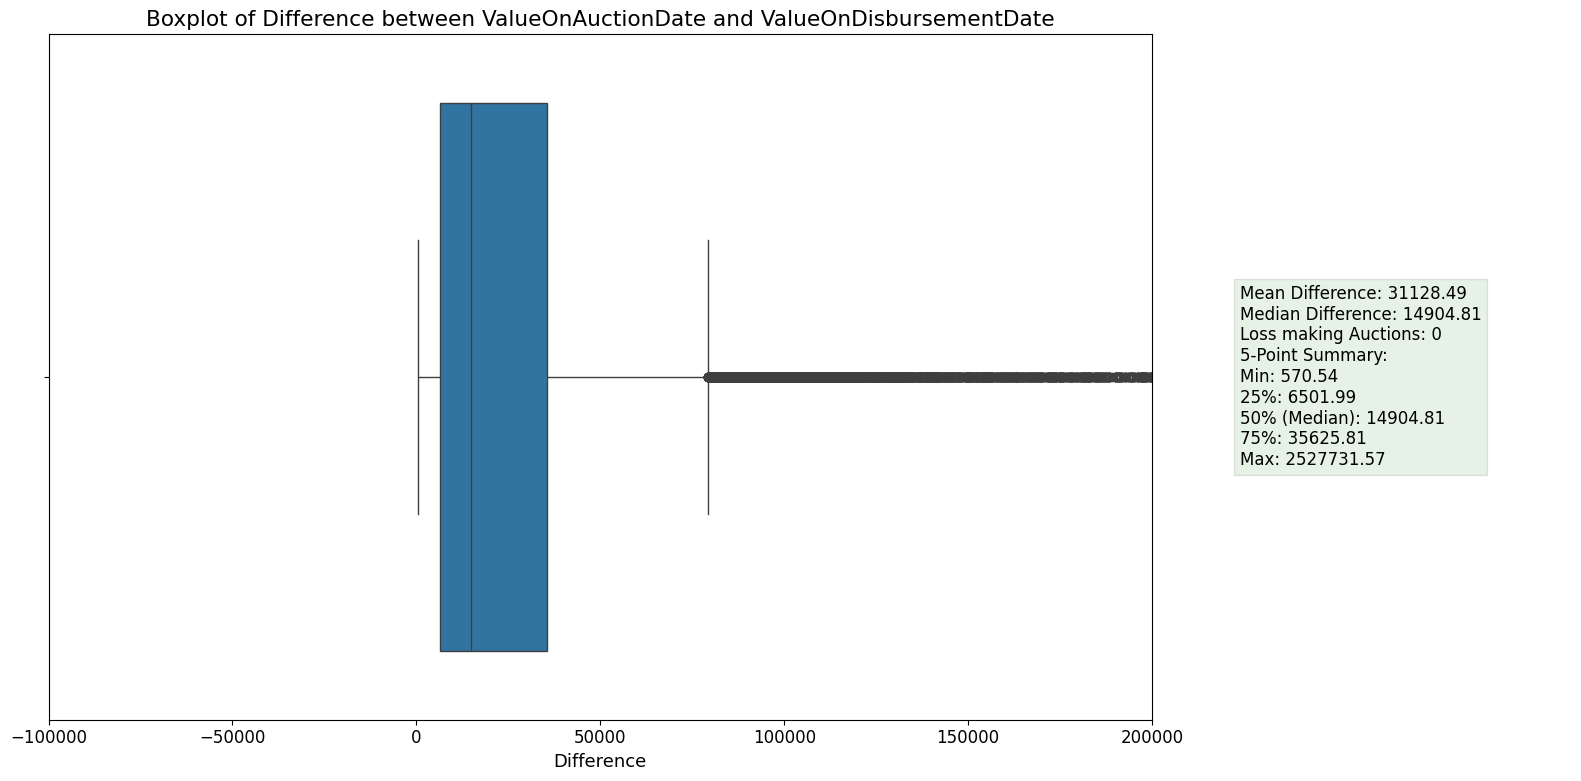

In [390]:
difference = df_merged['ValueOnAuctionDate'] - df_merged['ValueOnDisbursementDate']

count_diff_less_than_zero = (difference < 0).sum()
mean_diff = difference.mean()
median_diff = difference.median()

five_point_summary = difference.describe(percentiles=[0.25, 0.5, 0.75])[['min', '25%', '50%', '75%', 'max']]

summary_text = (
    f"Mean Difference: {mean_diff:.2f}\n"
    f"Median Difference: {median_diff:.2f}\n"
    f"Loss making Auctions: {count_diff_less_than_zero}\n"
    f"5-Point Summary:\n"
    f"Min: {five_point_summary['min']:.2f}\n"
    f"25%: {five_point_summary['25%']:.2f}\n"
    f"50% (Median): {five_point_summary['50%']:.2f}\n"
    f"75%: {five_point_summary['75%']:.2f}\n"
    f"Max: {five_point_summary['max']:.2f}"
)

fig, axs = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'width_ratios': [3, 1]})

sns.boxplot(x=difference, ax=axs[0])
axs[0].set_title('Boxplot of Difference between ValueOnAuctionDate and ValueOnDisbursementDate')
axs[0].set_xlabel('Difference')
axs[0].set_xlim(-100000, 200000)

axs[1].axis('off')
axs[1].text(0.1, 0.5, summary_text, fontsize=12, verticalalignment='center', bbox=dict(facecolor='green', alpha=0.1))

plt.tight_layout()
plt.show()

### Analysis on Auction Place and State

C:\Users\sachi\AppData\Local\Temp\ipykernel_20224\3961575800.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=data_plot, order=categories_to_plot, palette='viridis')


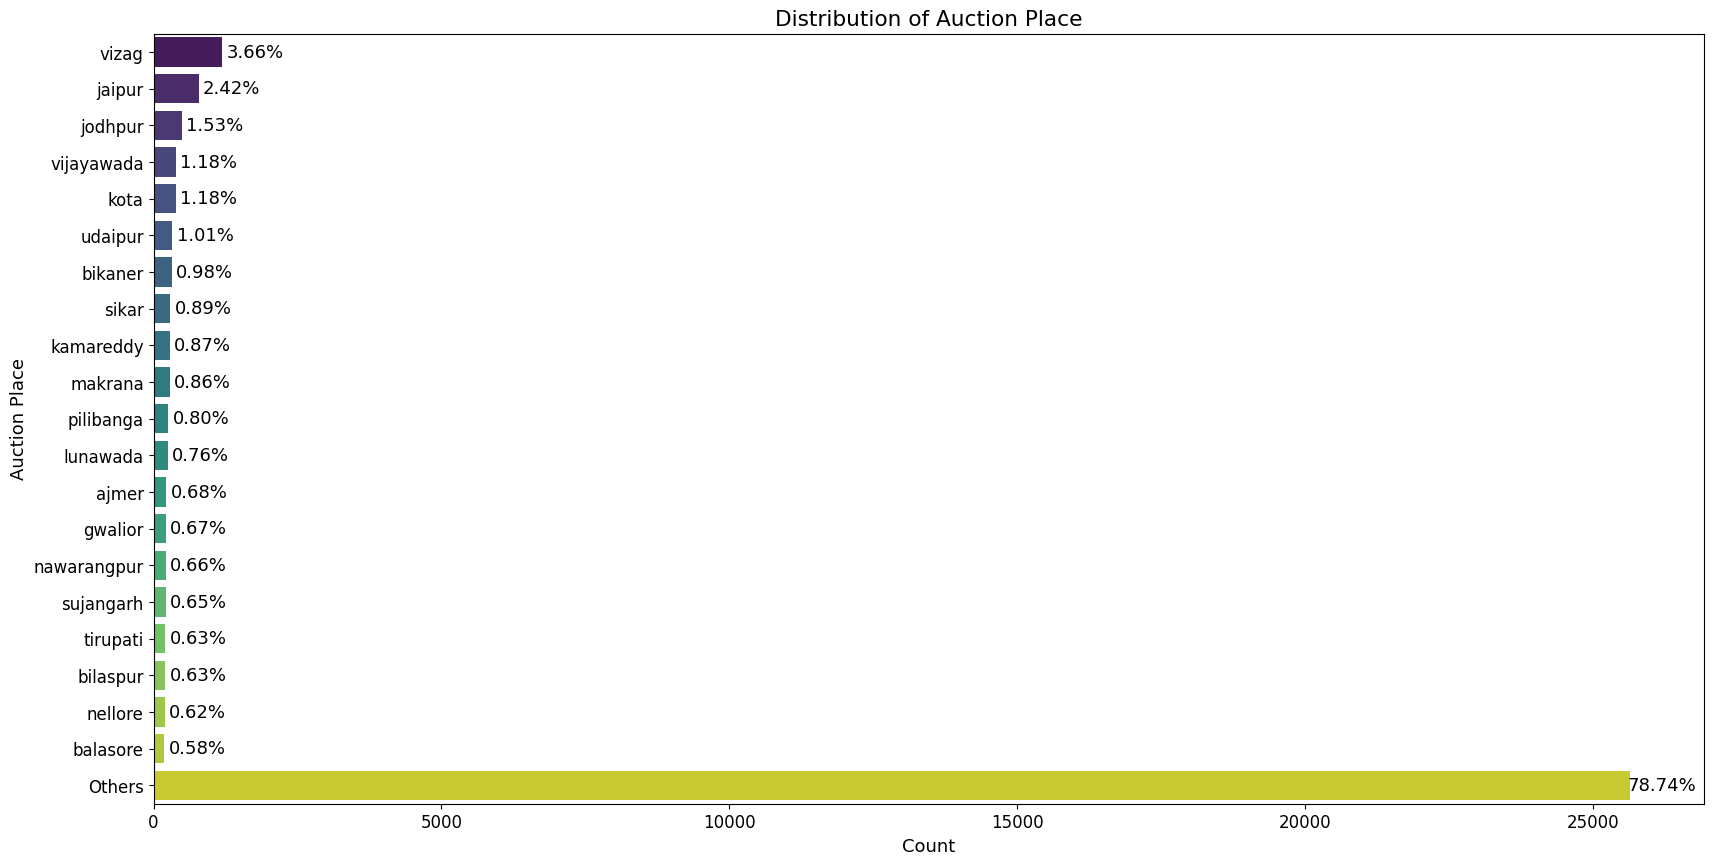

C:\Users\sachi\AppData\Local\Temp\ipykernel_20224\3961575800.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=data_plot, order=categories_to_plot, palette='viridis')


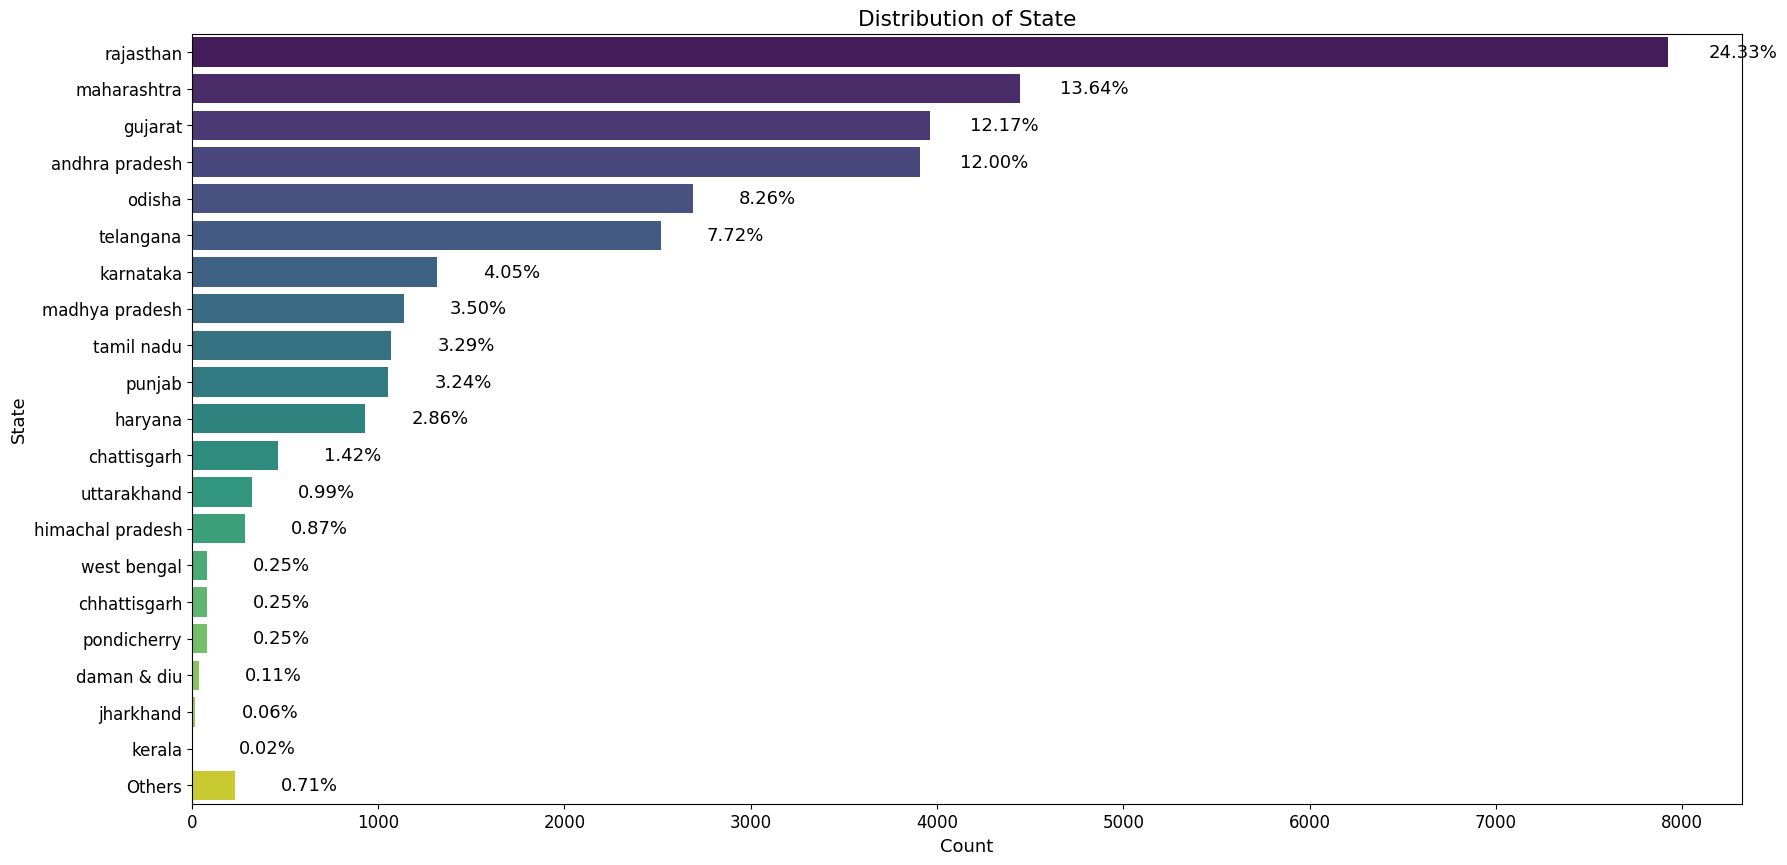

In [391]:

def plot_categorical(data, column_name):
    plt.figure(figsize=(20, 10))
    
    top_10 = data[column_name].value_counts().nlargest(20)
    
    if data[column_name].nunique() > 10:
        data_plot = data[column_name].apply(lambda x: x if x in top_10.index else 'Others')
        categories_to_plot = top_10.index.tolist() + ['Others']
    else:
        data_plot = data[column_name]
        categories_to_plot = top_10.index.tolist()
    
    ax = sns.countplot(y=data_plot, order=categories_to_plot, palette='viridis')
    # ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
    #             ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    total = len(data_plot)
    for p in ax.patches:
        percentage = f'{100 * p.get_width() / total:.2f}%'
        ax.annotate(percentage, (p.get_width() + 0.01 * total, p.get_y() + p.get_height() / 2.), 
                    ha='center', va='center', xytext=(10, 0), textcoords='offset points')
    
    plt.title(f'Distribution of {column_name}')
    plt.xlabel('Count')
    plt.ylabel(column_name)
    plt.show()


categorical_columns = [
    'Auction Place', 'State'
]

for col in categorical_columns:
    plot_categorical(df, col)


### Analysis of high stress locations (40%)

In [392]:
difference = df_merged['ValueOnDisbursementDate'] - df_merged['Loan Amount']

count_diff_less_than_zero = (difference < 0).sum()
mean_diff = difference.mean()
median_diff = difference.median()
percentage_diff = (difference / df_merged['ValueOnDisbursementDate']) * 100

count_greater_than_40_percent = (percentage_diff > 40).sum()
count_greater_than_50_percent = (percentage_diff > 50).sum()

rows_greater_than_40_percent = df_merged[percentage_diff > 40]



C:\Users\sachi\AppData\Local\Temp\ipykernel_20224\3957977850.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=data_plot, order=categories_to_plot, palette='viridis')


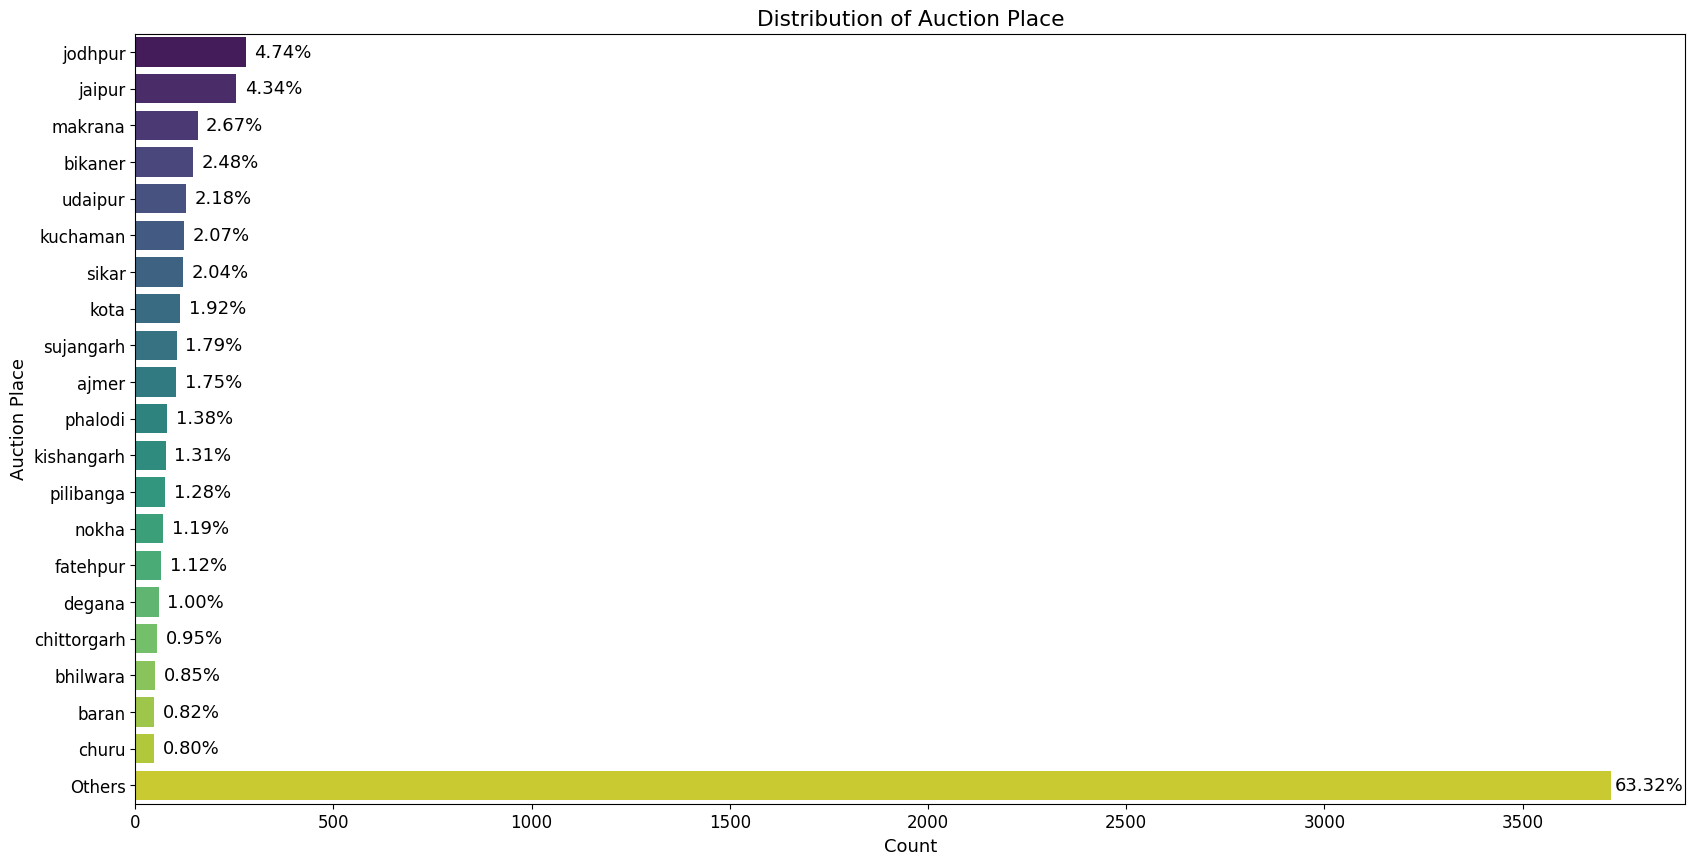

C:\Users\sachi\AppData\Local\Temp\ipykernel_20224\3957977850.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=data_plot, order=categories_to_plot, palette='viridis')


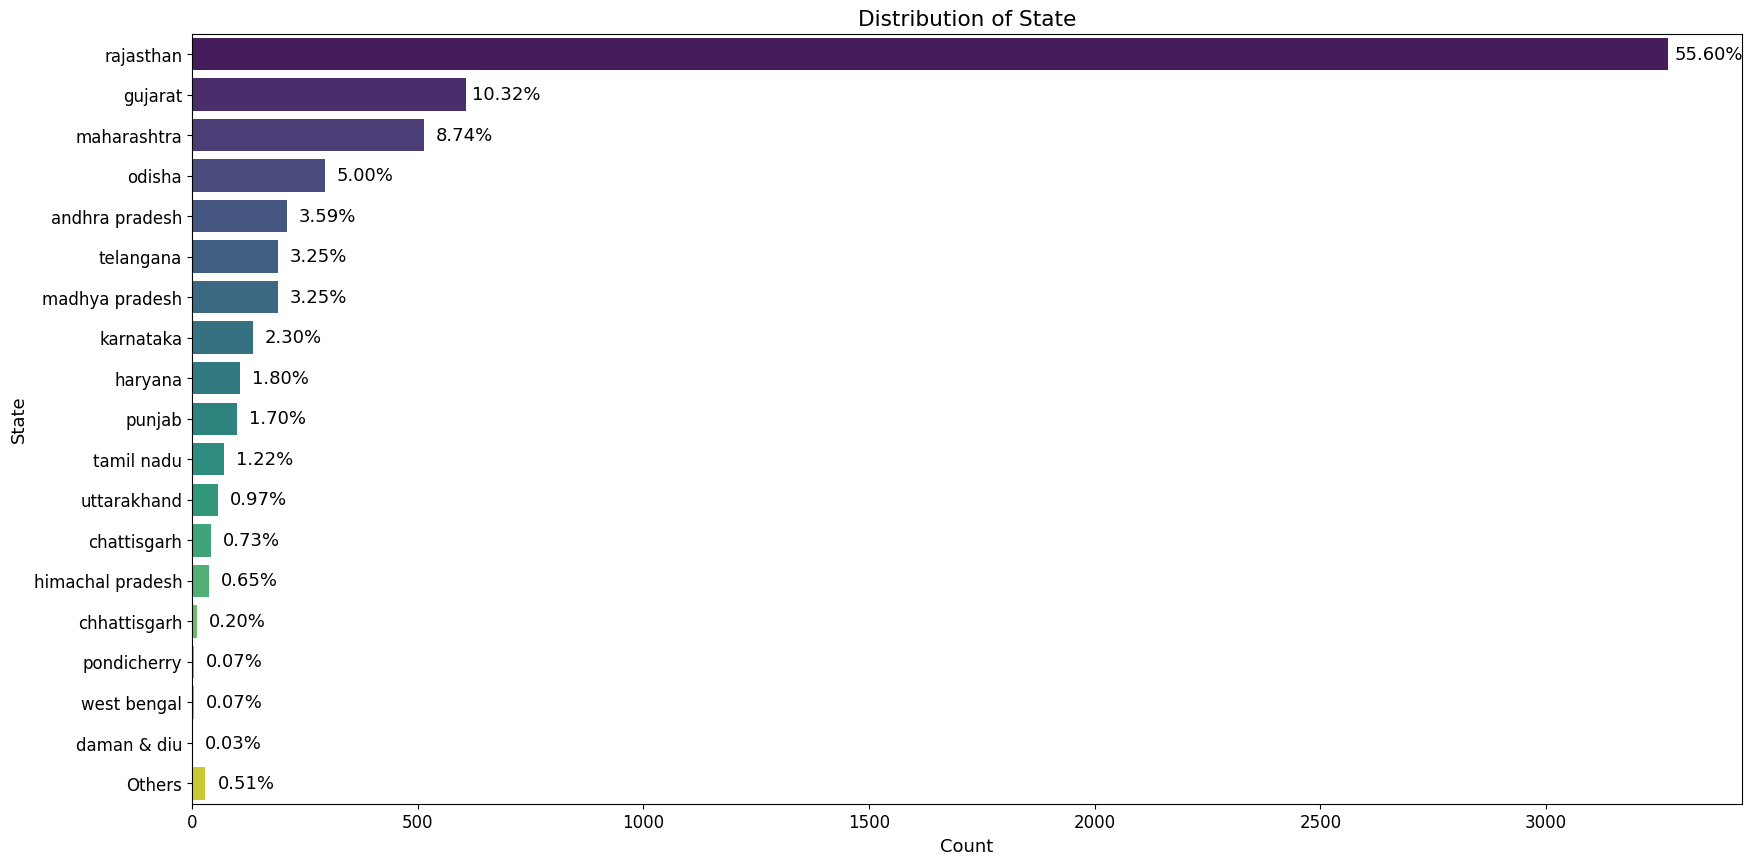

In [393]:

def plot_categorical(data, column_name):
    plt.figure(figsize=(20, 10))
    
    top_10 = data[column_name].value_counts().nlargest(20)
    
    if data[column_name].nunique() > 10:
        data_plot = data[column_name].apply(lambda x: x if x in top_10.index else 'Others')
        categories_to_plot = top_10.index.tolist() + ['Others']
    else:
        data_plot = data[column_name]
        categories_to_plot = top_10.index.tolist()
    
    ax = sns.countplot(y=data_plot, order=categories_to_plot, palette='viridis')
    # ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
    #             ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    total = len(data_plot)
    for p in ax.patches:
        percentage = f'{100 * p.get_width() / total:.2f}%'
        ax.annotate(percentage, (p.get_width() + 0.01 * total, p.get_y() + p.get_height() / 2.), 
                    ha='center', va='center', xytext=(10, 0), textcoords='offset points')
    
    plt.title(f'Distribution of {column_name}')
    plt.xlabel('Count')
    plt.ylabel(column_name)
    plt.show()


categorical_columns = [
    'Auction Place', 'State'
]

for col in categorical_columns:
    plot_categorical(rows_greater_than_40_percent, col)
